Unsupervised
=====

# K-means
! Distinguish KNN from K_mean, the former one is supervised classification while the latter one is unsupervised clustering!

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
df=load_iris()

In [3]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
model = KMeans(n_clusters=3)

In [5]:
fitted = model.fit(df.data)
res =fitted.predict(df.data)
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [6]:
fitted.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [7]:
fitted.inertia_

78.940841426146022

In [8]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

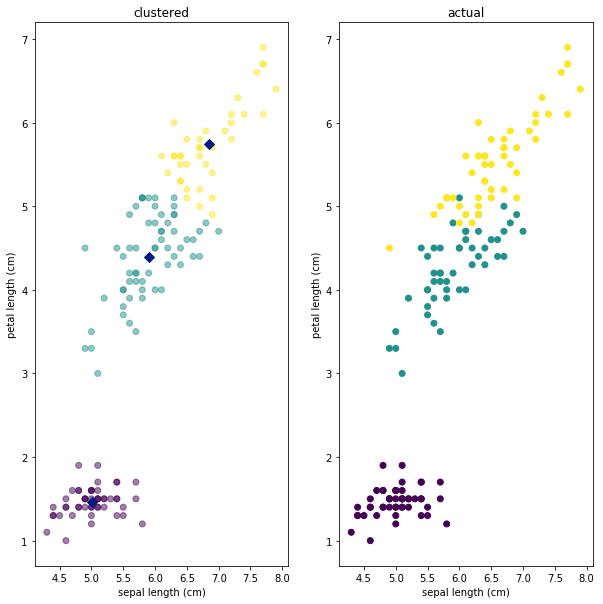

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.scatter(df.data[:,0],df.data[:,2],c=res,alpha=.5)
plt.title('clustered')
plt.scatter(fitted.cluster_centers_[:,0],fitted.cluster_centers_[:,2],marker='D',s=50)
plt.xlabel(df.feature_names[0])
plt.ylabel(df.feature_names[2])

plt.subplot(1,2,2)
plt.scatter(df.data[:,0],df.data[:,2],c=df.target)
plt.title('actual')
plt.xlabel(df.feature_names[0])
plt.ylabel(df.feature_names[2])

plt.show()

In [10]:
import pandas as pd 

In [11]:
df_pd=pd.DataFrame({'actual':df.target,"clustered":res})
pd.crosstab(df_pd.actual,df_pd.clustered)

clustered,0,1,2
actual,,,
0,50,0,0
1,0,48,2
2,0,14,36


# Visualising Hierachies

In [12]:
test=pd.DataFrame(df.target)
dict1 = {"0":'setosa', "1":'versicolor', "2":'virginica'}

In [13]:
import numpy as np
test.columns =['name']
test.name = test.name.astype('str')
test.replace({'name':dict1},inplace=True)
test.head()
LABELS=np.array(test.name)

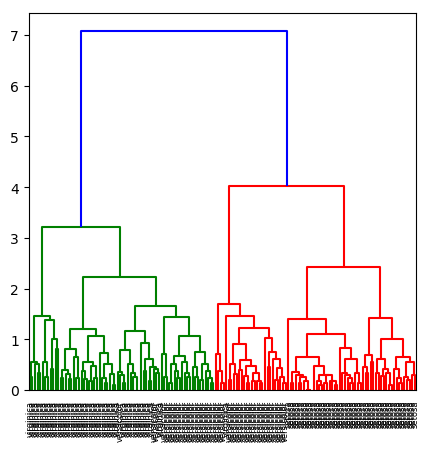

In [14]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(df.data,method='complete')


# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(5,5),dpi=100)
dendrogram(mergings,
           labels=LABELS,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


# t-SNE
t-distributed stochastic neighbour embedding

Visually reduct dimensions to 2D

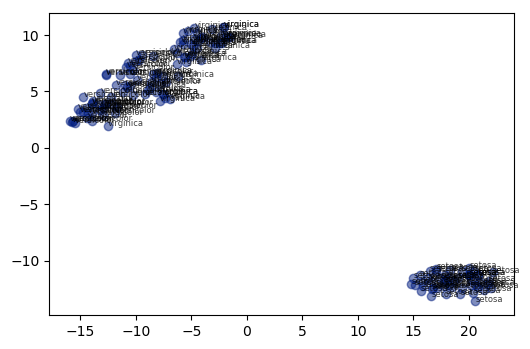

In [15]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(df.data)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(dpi=100)
plt.scatter(xs,ys,alpha=.5)

# Annotate the points
for x, y, lab in zip(xs, ys, LABELS):
    plt.annotate(lab, (x, y), fontsize=6, alpha=0.75)
plt.show()


# PCA

In [16]:
df = load_iris()
df = df.data[:,2:4]

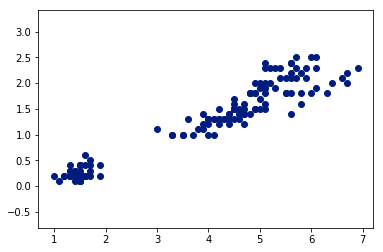

0.962757097051 ... 5.7766609885e-86


In [17]:
# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = df[:,0]

# Assign the 1st column of grains: length
length = df[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation,'...',pvalue)

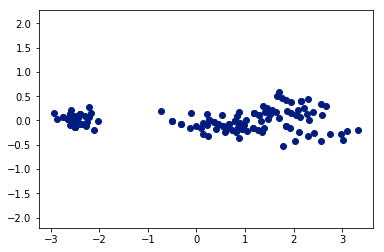

-1.6373473107e-17 ... 1.0


In [18]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(df)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation,"...",pvalue)

** By rotating and moving the original data, pca de-correlated the x and y**

**intrinsic demension is number of PCA features with significant variance**

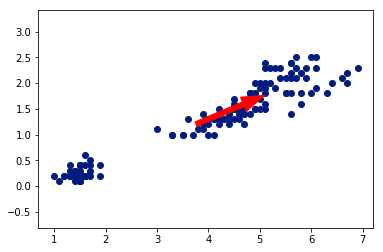

In [19]:
# Make a scatter plot of the untransformed points
plt.scatter(df[:,0], df[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(df)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.1)

# Keep axes on same scale
plt.axis('equal')
plt.show()


### Variance of the PCA features

In [20]:
from sklearn.datasets import load_breast_cancer

In [21]:
df = load_breast_cancer()

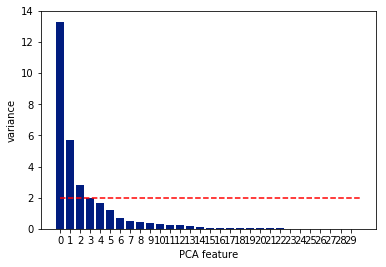

In [33]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(df.data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)

plt.hlines(y=2,colors='red',linestyles='--',xmin=0,xmax=30)
plt.show()
#it looks the first 3(arbitrary) features have the most significant variance, hence the intrinsic dimension is 3

**! PCA cannot be used on sparse matrix (eg. csr), use TruncatedSVD instead**

# NMF (Non-negative matrix factorization)

In [35]:
df = load_breast_cancer()

In [47]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(df.data)

# Transform the articles: nmf_features
nmf_features = model.transform(df.data)

# Print the NMF features
print(nmf_features)

#print the NMF components
print(model.components_)    # <- 6 compoments, each has n features as the original datasets

[[ 11.94494691   0.           0.87553884   3.82024642   0.          14.4644016 ]
 [ 13.24715876   2.89603724   0.58625294   1.2186358    0.53355786   0.        ]
 [ 11.29999969   3.39500093   0.68626033   1.97738314   0.59935629   0.        ]
 ..., 
 [  7.50292016   3.04076823   0.78358286   0.86056737   1.03828635   0.        ]
 [ 12.13813162   3.29127125   0.94442974   1.65948149   1.04277724   0.        ]
 [  1.66169276   0.54909725   0.61402646   0.42114627   1.10259989   0.        ]]
[[  8.43037730e-01   3.77193202e-02   5.81201168e+00   8.33163573e+01
    0.00000000e+00   4.66997743e-03   1.01481538e-02   6.98031073e-03
    0.00000000e+00   0.00000000e+00   9.67873067e-03   0.00000000e+00
    5.18676241e-02   2.51111157e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   6.56598765e-05   0.00000000e+00   0.00000000e+00
    1.25027269e+00   2.28138814e-01   8.47185735e+00   1.43294106e+02
    9.24867880e-04   1.74489682e-02   2.88619528e-02   1.30526875e-02
    4.12275487e-

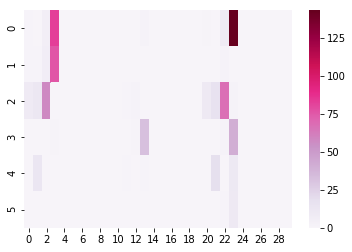

In [56]:
import seaborn as sns
sns.heatmap(pd.DataFrame(model.components_),cmap="PuRd")
plt.show()

|| NMF components || x || NMF features || = original matrix

In [46]:
pd.DataFrame(nmf_features) # original features have been reducted into 6 composed ones

,0,1,2,3,4,5
0,11.944947,0.000000,0.875539,3.820246,0.000000,14.464402
1,13.247159,2.896037,0.586253,1.218636,0.533558,0.000000
2,11.300000,3.395001,0.686260,1.977383,0.599356,0.000000
3,3.755772,0.947859,0.899627,0.523500,0.561262,0.000000
4,10.376603,5.634929,0.674983,2.067178,0.053965,0.000000
5,5.009197,0.775009,0.844680,0.429924,0.393583,0.000000
6,10.924194,1.687753,0.793927,0.782983,0.602927,0.000000
7,5.885702,1.127260,0.826356,1.082798,0.675316,0.000000
8,4.993279,1.355039,0.866855,0.327691,0.759974,0.000000
9,4.766575,1.028714,0.815310,0.317319,1.236324,0.000000


**<font color='red'>Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. </font>**